
Cargue los datos a trabajar en un *dataframe* de pandas. Exprese las variables que tienen valores categóricos en su estructura original, para así tener una información más clara de lo que significa en un comienzo. 


In [1]:
import pandas as pd
import numpy as np

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'


C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to 

a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

In [2]:
import matplotlib.pyplot as plt

edad = df['age']
n,bins,patches = plt.hist(x=edad, bins='auto',alpha=0.9,rwidth=0.9)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma edad pacientes')


Text(0.5,1,'Histograma edad pacientes')

Con el objetivo de explorar los datos se elaboró el histograma anterior para las edades de los pacientes. La distribución etaria de la población es relativamente uniforme entre los 40 y 70 años. Se indagará si este rango exhibe mayor riesgo de enfermedad cardíaca.

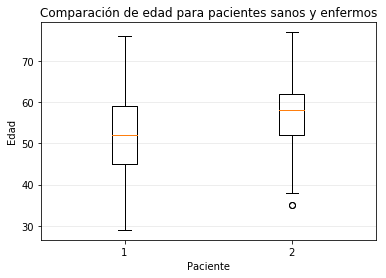

In [3]:
paciente_enfermo_edad = list()
paciente_sano_edad = list()

paciente_enfermo = list()
paciente_sano = list()

paciente_enfermo_presion = list()
paciente_sano_presion = list()

paciente_enfermo_angina = 0
paciente_enfermo_no_angina = 0
paciente_sano_angina = 0
paciente_sano_no_angina = 0

for i in range(len(df)):
    if df['normal'][i]==1:
        paciente_sano_edad.append(df['age'][i])
        paciente_sano.append(df['serum'][i])
        paciente_sano_presion.append(df['blood_p'][i])
        if(df['angina'][i]=='no'):
            paciente_sano_no_angina += 1
        else:
            paciente_sano_angina += 1
        
    else:
        paciente_enfermo_edad.append(df['age'][i])
        paciente_enfermo.append(df['serum'][i])
        paciente_enfermo_presion.append(df['blood_p'][i])
        if(df['angina'][i]=='no'):
            paciente_enfermo_no_angina += 1
        else:
            paciente_enfermo_angina += 1
    

edad = [paciente_sano_edad,paciente_enfermo_edad]
fig, axs = plt.subplots()

axs.set_axisbelow(True)
axs.set_title('Comparación de edad para pacientes sanos y enfermos')
axs.set_xlabel('Paciente')
axs.set_ylabel('Edad')

axs.boxplot(edad)
axs.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

La distribución de edad para pacientes enfermos se encuentra concentrada pasados los 50 años de edad, sin embargo, existe una importante sobreposición con la distribución de pacientes sanos, es decir, no existe una correlación clara que permita predecir una aflicción cardíaca a partir de la edad del paciente.

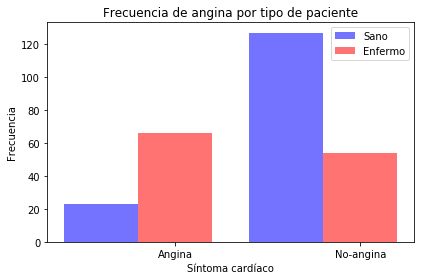

In [4]:
sano = [paciente_sano_angina, paciente_sano_no_angina]
enfermo =[paciente_enfermo_angina, paciente_enfermo_no_angina]
#objetos = ('Sano-angina','Sano-no angina','Enfermo-angina','Enfermo-no angina')
objetos = ('Angina','No-angina')

grupos=2
fig,ax = plt.subplots()
index = np.arange(grupos)
ancho = 0.4
alfa = 0.55

barra1 = plt.bar(index, sano , ancho,
alpha=alfa,
color='b',
label='Sano')

rects2 = plt.bar(index + ancho, enfermo, ancho,
alpha=alfa,
color='r',
label='Enfermo')

plt.xlabel('Síntoma cardíaco')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de angina por tipo de paciente')
plt.xticks(index + ancho, ('Angina', 'No-angina'))
plt.legend()

plt.tight_layout()
plt.show()

Se observa una sustancial ausencia de angina en los pacientes sanos. Se muestra también que una enfermedad se puede presentar sin angina en un importante número de los casos. Más aún, existe una minoría de pacientes sanos que sí presentan angina. Lo anterior sugiere que este indicador tiene una mayor correlación con la falta de una enfermedad cardíaca que con su existencia.

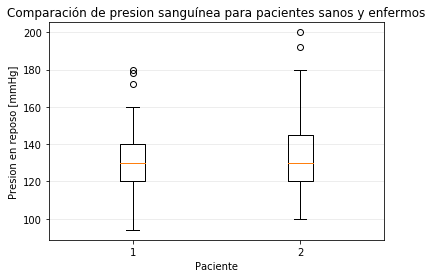

In [5]:
presion = [paciente_sano_presion,paciente_enfermo_presion]
fig, axs = plt.subplots()

axs.set_axisbelow(True)
axs.set_title('Comparación de presion sanguínea para pacientes sanos y enfermos')
axs.set_xlabel('Paciente')
axs.set_ylabel('Presion en reposo [mmHg]')

axs.boxplot(presion)
axs.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

La presión sanguínea no parece corresponder a un predictor de enfermedad cardíaca particularmente efectivo por sí solo, dada la similitud de sus distribuciones observadas en el gráfico. No obstante, la amplitud de los bigotes sugiere que más alla del rango de 160 [mmHg] en reposo aumenta la correlación con una patología cardíaca.  

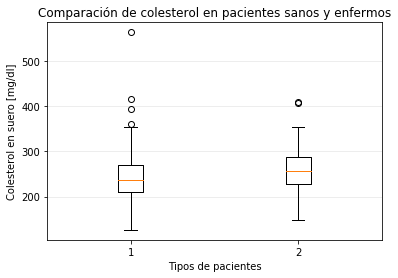

In [6]:

colesterol = [paciente_sano,paciente_enfermo]
fig, axs = plt.subplots()

axs.set_axisbelow(True)
axs.set_title('Comparación de colesterol en pacientes sanos y enfermos')
axs.set_xlabel('Tipos de pacientes')
axs.set_ylabel('Colesterol en suero [mg/dl]')

axs.boxplot(colesterol)
axs.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


Similar a la edad, el colesterol no está sesgado hacia la ausencia o presencia de una patología cardíaca.

b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como one hot vectors, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. Explique la importancia de éste paso.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df)
df.head()


,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Dado que emplearemos modelos de regresión lineal este paso tiene como fin permitirle al modelo emplear los valores categóricos. De no hacerlo se perdería la información otorgada por estos datos, pues el modelo no sería capaz de usarlos para aprender a identificar inputs.

c) Extraiga la información de la enfermedad cardíaca (clase binaria) además de la variable continua que nos intereserá predecir en esta instancia (target) con un modelo de regresión lineal.

In [8]:
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values

df.head()
X_data = df.values



Los datos se estandarizan pues esto elimina la influencia que una magnitud mayor tiene sobre el peso que el modelo le asignará a esa variable. Esto es, un factor de presión sanguínea de 180 tendrá un mayor efecto en la función lineal que un factor de edad de 80 solo debido a que la escala de uno es diferente a la de su contraparte. Normalizar los valores elimina estas diferencias y efectos indeseados.

d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [9]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 

reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]

print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 

In [10]:
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)


Los datos se estandarizan pues esto elimina la influencia que una magnitud mayor tiene sobre el peso que el modelo le asignará a esa variable. Esto es, un factor de presión sanguínea de 180 tendrá un mayor efecto en la función lineal que un factor de edad de 80 solo debido a que la escala de uno es diferente a la de su contraparte. Normalizar los valores elimina estas diferencias y efectos indeseados.

f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un quantile-quantile plot determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

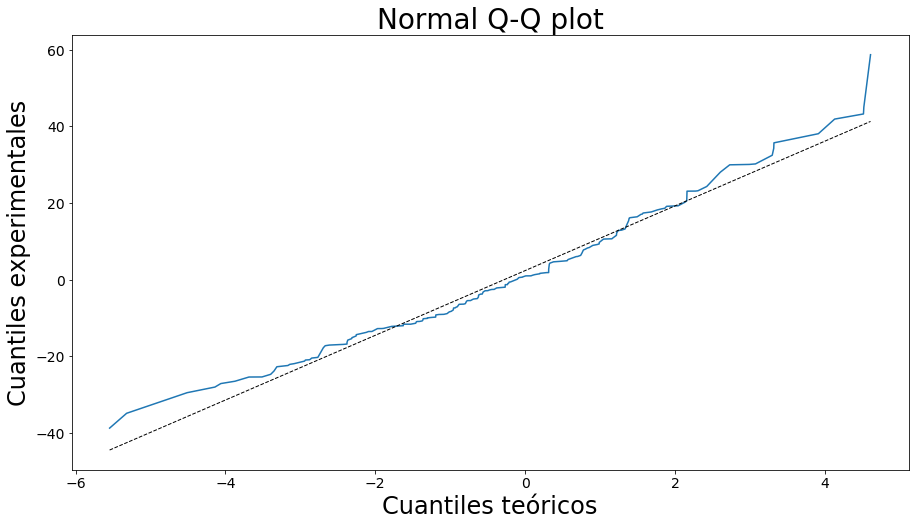

In [11]:
from sklearn.linear_model import LinearRegression
from numpy import random as random
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

residuales = list()
for i in range(len(reg_pred_train)):
    error = reg_label_train[i] - reg_pred_train[i]
    residuales.append(error)
    
residuales.sort()
norm = random.normal(0,2,len(residuales))
norm.sort()
plt.figure(figsize=(15,8),facecolor='1.0')
plt.plot(norm,residuales,0)

z = np.polyfit(norm,residuales, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=1)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Cuantiles teóricos", size=24)
plt.ylabel("Cuantiles experimentales", size=24)
plt.tick_params(labelsize=14)
plt.show()

Se observa un ajuste lineal muy holgado entre ambas gráficas, por lo tanto, no es razonable inferir que los residuos del modelo se distribuyen normalmente.

g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

media_sanguinea=reg_label.mean()

p1=mean_absolute_error(reg_label_train, reg_pred_train)*100/media_sanguinea
p2=mean_absolute_error(reg_label_test, reg_pred_test)*100/media_sanguinea
print("MAE train:",round(p1,1),"%")
print("MAE test:",round(p2,2),"%")

MAE train:  12.520139292308563
MAE test:  13.66061335199971
MAE train: 9.5 %
MAE test: 10.4 %


La diferencia porcentual del error absoluto medio está cercana al 10% en ambos conjuntos.
El error absoluto medio en el conjunto de entrenamiento es menor que su equivalente en el conjunto de prueba. Esto indica que el modelo padece de overfitting.

i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=len(Xstd_train))
mse_cv = 0
mse_cv_real = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
    
    y_real = linreg.predict(Xstd_test)
    mse_real = np.mean( np.square(y_real - reg_label_test) )
    mse_cv_real += mse_real
    
mse_cv = mse_cv/len(Xstd_train)
mse_cv_real = mse_cv_real/len(Xstd_train)

print("Calidad Leave-One-Out:", mse_cv**0.5)
print("Calidad Leave-One-Out real:",mse_cv_real**0.5)

kf = KFold(n_splits=5)
mse_cv = 0
mse_cv_real = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
    
    y_real = linreg.predict(Xstd_test)
    mse_real = np.mean( np.square(y_real - reg_label_test) )
    mse_cv_real += mse_real
mse_cv = mse_cv / 5
mse_cv_real = mse_cv_real/5
print("Calidad K=5:",mse_cv**0.5)
print("Calidad K=5 real:",mse_cv_real**0.5)

Calidad Leave-One-Out: 18.370773473758984
Calidad Leave-One-Out real: 16.23136003054244
Calidad K=5: 19.028948487521646
Calidad K=5 real: 16.6531748840774


Dado que ambos modelos poseen menor error medio absoluto para los conjuntos de entrenamiento que para sus respectivos conjuntos de prueba, se observa que los 2 poseen una razonable capacidad de generalización. No obstante, el error del modelo entrenado con leave-one-out es calculado con respecto a un único dato, por lo que no es tan representativo como el error medio absoluto calculado para K=5.
Comparando ambos modelos leave-one-out se adapta mejor al conjunto de entrenamiento. Esto es lo que se espera dado el tamaño del conjunto de entrenamiento para este caso. Debido al argumento ya expuesto respecto a la representatibilidad del error medio reportado para K=N, se considera que el modelo entrenado con K=5 está mejor preparado para instancias de nuevos inputs.

j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 

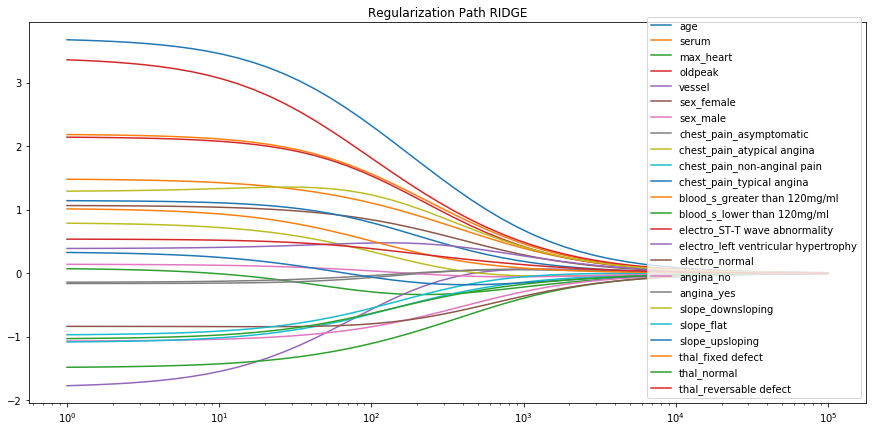

In [14]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
modelR = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    modelR.set_params(alpha=a)
    modelR.fit(Xstd_train, reg_label_train)
    coefs.append(modelR.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

El gráfico refleja el comportamiento asintótico de la penalización del método Ridge. Luego de que el parámetro de regularización sobrepasa cierto umbral, los coeficientes de todos los parámetros se acercan asintóticamente a cero.

También es notable la fluctuación de algunos coeficientes. A modo de ejemplo, el pulso cardíaco máximo (línea verde cercana a 0 en el eje vertical y en el cuadrante positivo) transiciona desde un coeficiente positivo a uno negativo para cierto valor del parámetro de regularización. Sin embargo, esta disminución se revierte al aumentar aún más este parámetro. El valor del coeficiente de pulso cardíaco eventualmente comienza a aumentar, hasta converger hacia cero. Este doble cambio en el signo de la pendiente puede atribuirse al 'descarte' de otros atributos (sus coeficientes alcanzaron el valor cero o un valor muy cercano a él). Si sucede que un cierto atributo 'x' y el atributo de pulso cardíaco presentan una fuerte correlación, entonces si el atributo 'x' pierde relevancia en el modelo (esto es su coeficiente disminuye casi a cero) pulso cardíaco ganará relevancia. Esto se refleja en el aumento de su propio coeficiente.

Lo anterior se cumple hasta cierto umbral. Dada la penalización empleada por el método de Ridge, si se escoge un valor para el parámetro de regularización que es demasiado alto en comparación a la suma de los residuos, entonces todos los coeficientes convergerán hacia cero. Esto efectivamente neutraliza la posible correlación entre atributos.

k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

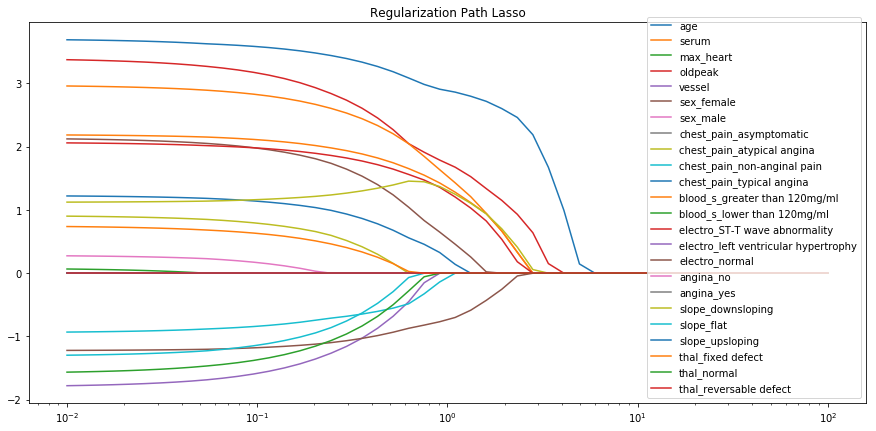

In [15]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
modelL = Lasso(fit_intercept=True)
for a in alphas_:
    modelL.set_params(alpha=a)
    modelL.fit(Xstd_train, reg_label_train)
    coefs.append(modelL.coef_)
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

El gráfico demuestra la diferencia en la severidad de la penalización del método de Lasso. Varios parámetros son anulados completamente, incluyendo el pulso cardíaco mencionado en el inciso anterior. La convergencia a cero no es asintótica en este caso, y ocurre para valores del parámetro de regularización varios órdenes de magnitud menores que en el caso de Ridge.

Se observan 'quiebres' que cambian la tasa de cambio de algunos de los coeficientes graficados. Estos cambios de magnitud para las pendientes evidencian un cambio en la estimación de la relevancia del correspondiente atributo. Se puede observar nuevamente que dichos cambios se producen cuando algún otro coeficiente llega a cero. Esto puede asociarse a lo argumentado anteriormente: dada una correlación entre atributos, al descartarse alguno de ellos se altera la relevancia de su semejante.

El gráfico también sugiere que Lasso es más ágil para detectar cuáles atributos son menos relevantes. Sin embargo, antes de haber verificado las métricas de la calidad del modelo no es razonable inferir que este método produce un mejor resultado.

l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la widget interactiva de ipython. Comente ¿Con qué valor de alpha se quedaría en cada caso?

In [16]:
from ipywidgets import interactive
def train_model(param):
    model = modelL#define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 8 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param', max=8, min=-10), Output()), _dom_classes=('widget-interact',))

Para el método de Lasso, alpha=-1 minimiza el error de prueba.

In [17]:
from ipywidgets import interactive
def train_model(param):
    model = modelR#define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widget-interact',))

Para el modelo regularizado con Ridge el menor error se tiene para alpha=1.

m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

selected = chest_pain_typical angina
totalvars= 2 R2 score = 0.18682405655371825
selected = age
totalvars= 3 R2 score = 0.21615919926248672
selected = max_heart
totalvars= 4 R2 score = 0.26486370520119895
selected = angina_yes
totalvars= 5 R2 score = 0.30016945528530903
selected = oldpeak
totalvars= 6 R2 score = 0.31388249040679383


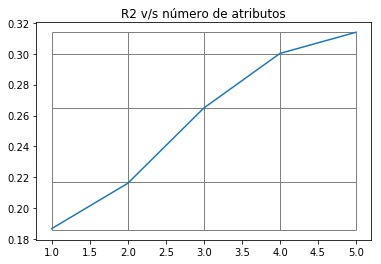

In [19]:
from sklearn.metrics import r2_score
def fss(x, y, names_x, k = 5):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list()
    for i in range(0,p):
        remaining.append(i)
    selected = [p]
    error=[]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            score = r2_score(y,predictions_train)
            score_candidates.append((score,candidate))
        score_candidates.sort()
        best_new_score,best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        error.append(best_new_score)
        print ("selected =",names_x[best_candidate])
        print ("totalvars=",len(indexes), "R2 score =",best_new_score)

    return (selected,error)

features_fss,error = fss(Xstd_test, reg_label_test, names_regressors)
need_feat = features_fss[:5]


plt.plot([1,2,3,4,5],error , label=label)
plt.xscale('linear')
plt.title('R2 v/s número de atributos')
plt.hlines(y=[0.186,0.2168,0.2648,0.3,0.3138], xmin=1, xmax=5, linewidth=1, color='grey')
plt.vlines(x=[1,2,3,4,5], ymin=0.186, ymax=0.3138, linewidth=1, color='grey')


plt.show()

El valor de R2 alcanza 0.3 cuando se tiene 5 atributos. Esto quiere decir que este conjunto de parámetros puede atibuirse el 30% de la varianza de la presión sanguínea. El 70% restante se atribuye a una combinación del resto de los atributos.

n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (target). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?